#Modelos Lineales Regularizados
Un modelo lineal regularizado (regularized linear model) es una versión de un modelo lineal que incluye un elemento en su función para evitar el sobreajuste (overfitting) y mejorar la capacidad de aprendizaje del modelo.

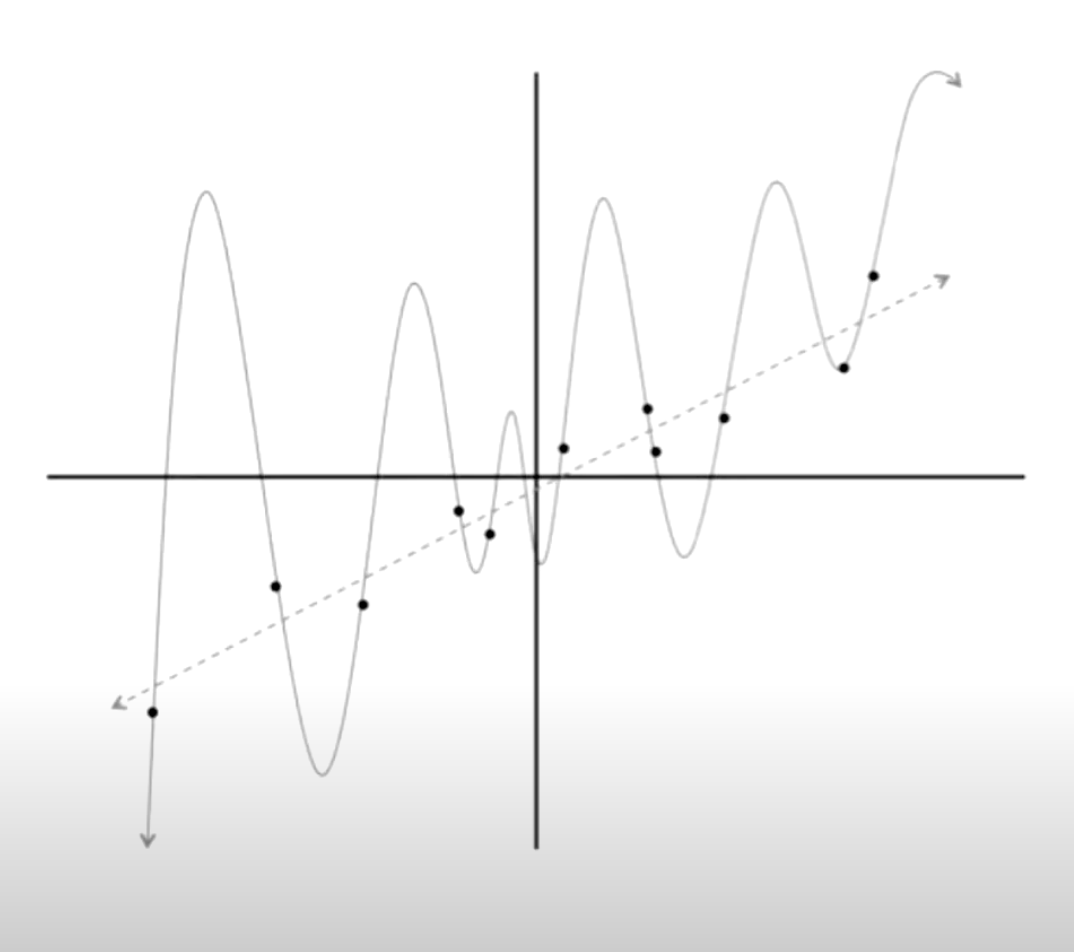

En términos generales, un modelo lineal (como el que vimos en el módulo anterior) intenta encontrar la relación entre las variables de entrada y la variable de salida. Sin embargo, si un modelo lineal tiene demasiados parámetros o si los datos son muy ruidosos, puede suceder que el modelo se ajuste demasiado a los datos de entrenamiento, produciéndose un claro sobreajuste y que dificulta generalizar bien a nuevos datos.

Para evitar este problema, los modelos lineales regularizados añaden un término extra para penalizar los valores de los coeficientes que son demasiado grandes. Estos modelos son regresiones lineales como las vistas en el módulo anterior pero con la adición de un término de regularización. Los dos tipos de modelos son:

- **Modelo lineal regularizado de Lasso (L1)**: Añade una penalización igual al valor absoluto de la magnitud de los coeficientes. Puede resultar en coeficientes iguales a cero, lo que indica que la característica correspondiente no se utiliza en el modelo.

- **Modelo lineal regularizado de Ridge (L2)**: Añade una penalización igual al cuadrado de la magnitud de los coeficientes. Esto tiende a reducir los coeficientes pero no los hace exactamente cero, por lo que todas las características se mantienen en el modelo.

Ambas técnicas intentan limitar o "penalizar" el tamaño de los coeficientes del modelo. Imaginemos que estamos ajustando una línea a puntos en un gráfico:

- Regresión lineal: Solo nos preocupamos por encontrar la línea que se ajusta mejor a los puntos.

- Regresión lineal de Ridge: Intentamos encontrar la línea que se ajusta mejor, pero también queremos que la pendiente de la línea se lo más pequeña posible.

- Regresión lineal de Lasso: Al igual que con Ridge, intentamos ajustar la línea y mantener la pendiente pequeña, pero Lasso puede llevar la pendiente a cero si eso ayuda a ajustar los datos. Esto es como si "seleccionase" qué variables son importantes y cuáles no, porque puede reducir la importancia de algunas variables a cero.

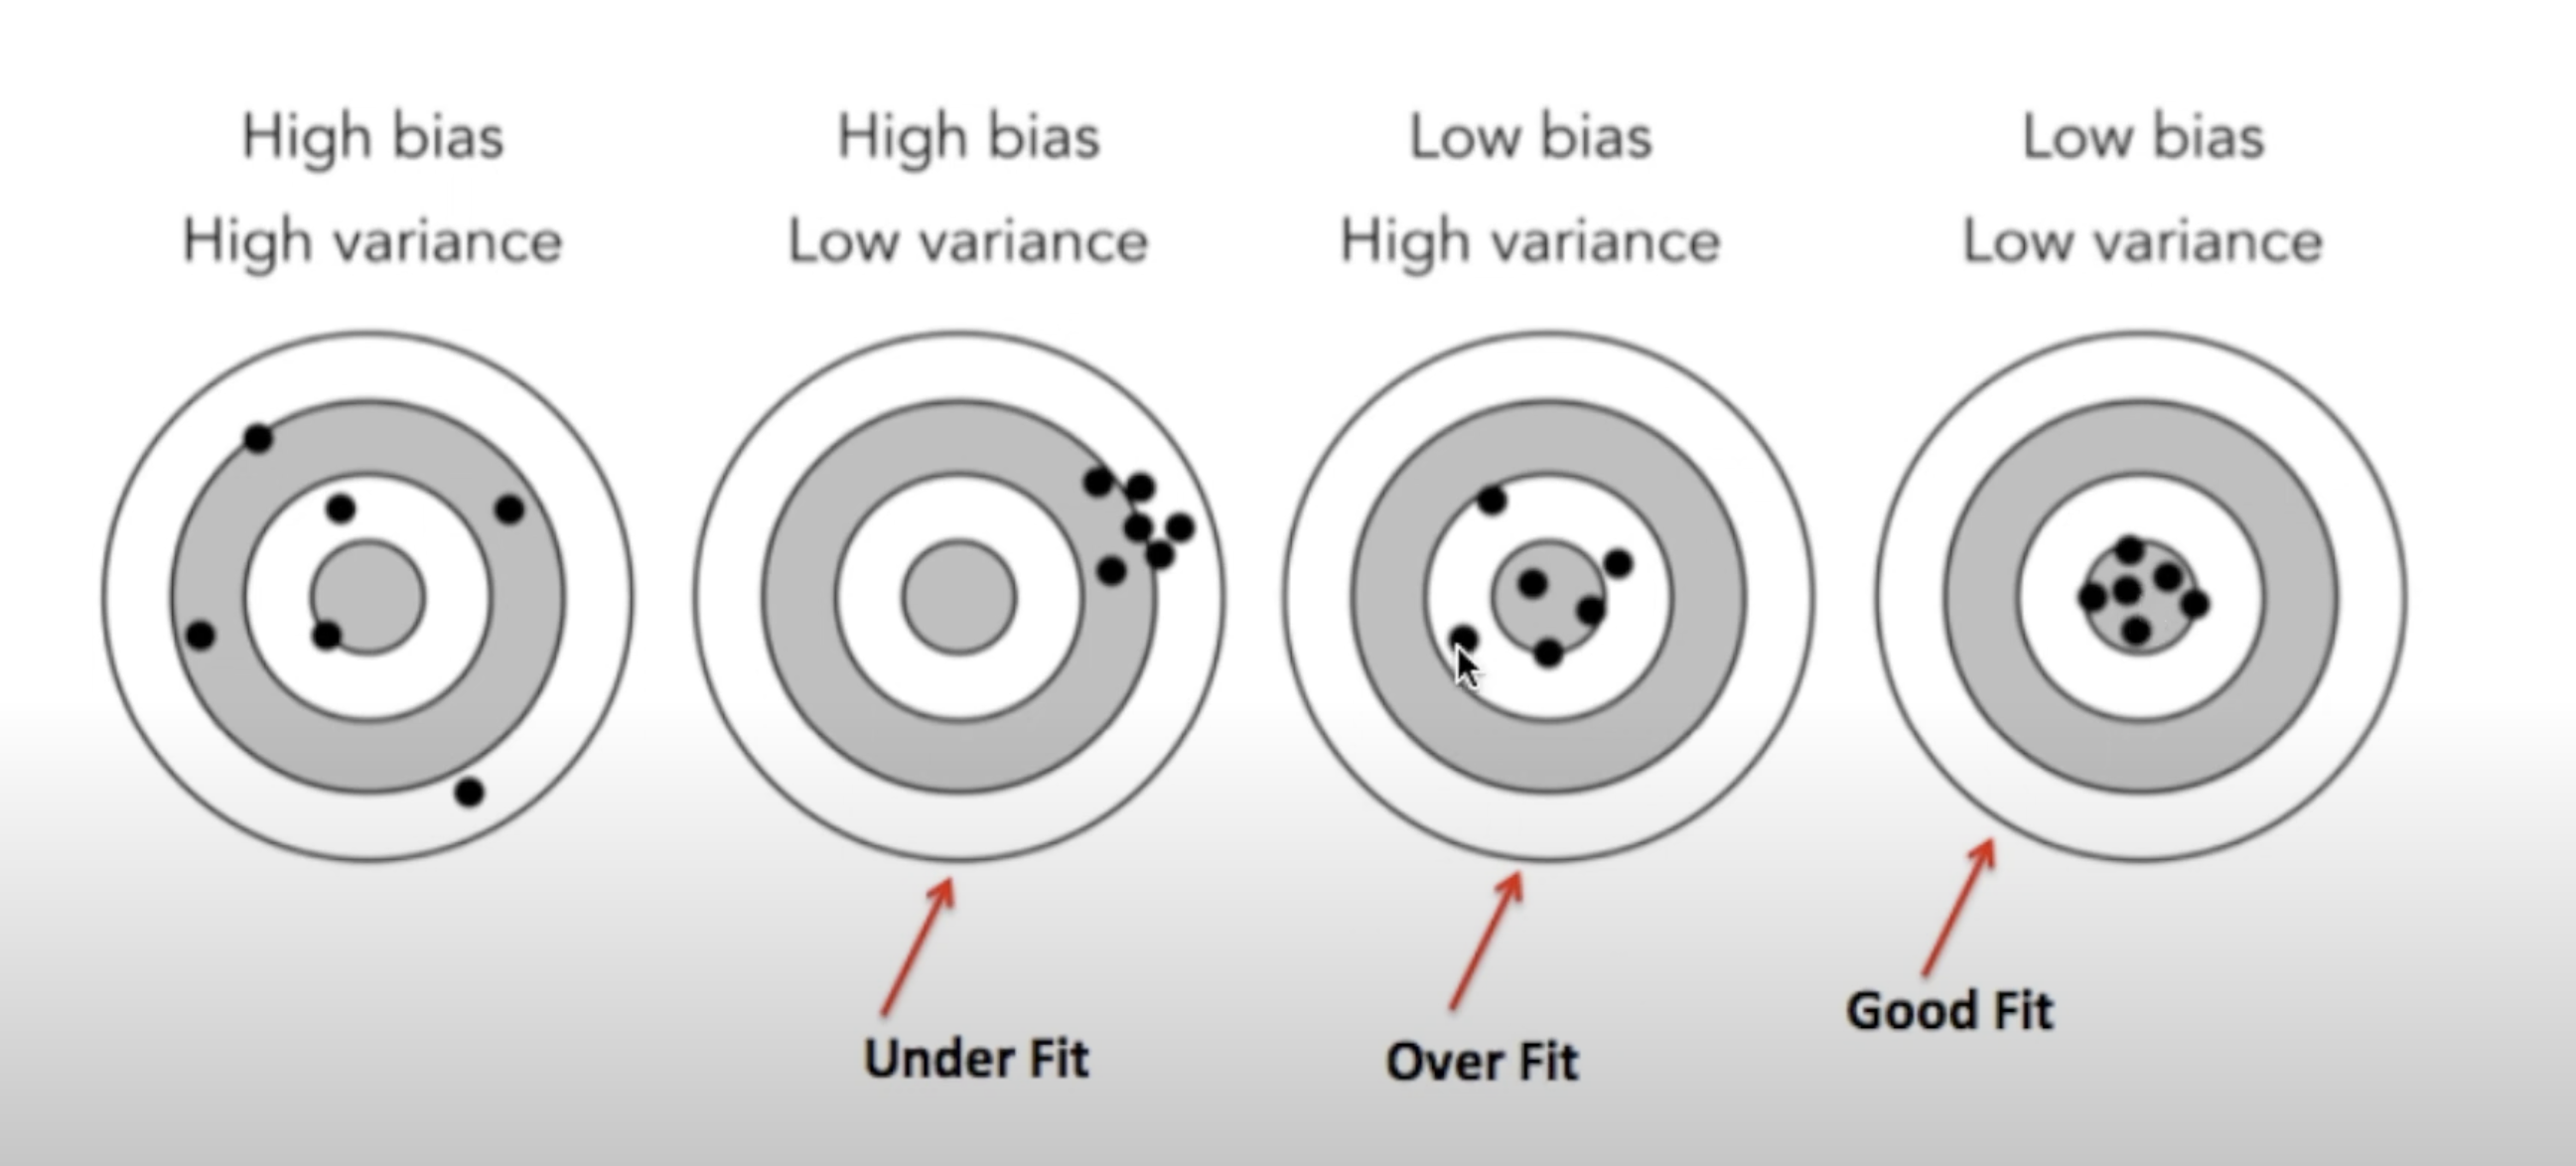

##Hiperparametrización del modelo
Podemos construir un modelo lineal regularizado fácilmente en Python utilizando la librería scikit-learn y las funciones Lasso y Ridge. Algunos de sus hiperparámetros más importantes y los primeros en los que debemos centrarnos son:

- **alpha**: Este es el hiperparámetro de regularización. Controla cuánto queremos penalizar los coeficientes altos. Un valor más alto aumenta la regularización y por lo tanto los coeficientes del modelo tienden a ser más pequeños. Por el contrario, un valor más bajo la reduce y permite coeficientes más altos. El valor por defecto es 1.0 y su rango de valores va desde 0.0 hasta infinito.

- **max_iter**: Es el número máximo de iteraciones del modelo.

Otro hiperparámetro muy importante es el random_state, que controla la semilla de generación aleatoria. Este atributo es crucial para asegurar la replicabilidad.



###Uso del modelo en Python
Puedes fácilmente utilizando scikit-learn programar estos métodos posterior al EDA:

**Lasso**

In [ ]:
from sklearn.linear_model import Lasso

# Carga de los datos de train y test
# Estos datos deben haber sido normalizados y correctamente tratados en un EDA completo

lasso_model = Lasso(alpha = 0.1, max_iter = 300)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(y_test)

**Ridge**

In [ ]:
from sklearn.linear_model import Ridge

# Carga de los datos de train y test
# Estos datos deben haber sido normalizados y correctamente tratados en un EDA completo

ridge_model = Ridge(alpha = 0.1, max_iter = 300)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(y_test)

##Ejemplo

Coeficientes Ridge: [[2.60307761]]
Coeficientes Lasso: [0.]


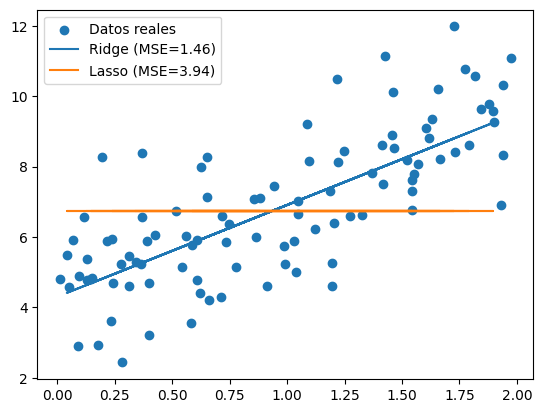

In [3]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 1.5 * np.random.randn(100, 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelos Ridge y Lasso
ridge_model = Ridge(alpha=1.0)  # El parámetro alpha controla la fuerza de la regularización
lasso_model = Lasso(alpha=1.0)

# Entrenar los modelos
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Realizar predicciones
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Calcular el error cuadrático medio
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

# Imprimir los coeficientes
print("Coeficientes Ridge:", ridge_model.coef_)
print("Coeficientes Lasso:", lasso_model.coef_)

# Graficar resultados
plt.scatter(X, y, label='Datos reales')
plt.plot(X_test, ridge_predictions, label=f'Ridge (MSE={ridge_mse:.2f})')
plt.plot(X_test, lasso_predictions, label=f'Lasso (MSE={lasso_mse:.2f})')
plt.legend()
plt.show()


Observa cómo los coeficientes del modelo Ridge y Lasso son diferentes. La regularización Ridge tiende a encoger los coeficientes hacia cero, mientras que la regularización Lasso puede llevar algunos coeficientes exactamente a cero.

La gráfica muestra los datos reales (puntos dispersos), así como las predicciones realizadas por modelos de regresión lineal con regularización Ridge y Lasso. Aquí hay algunas interpretaciones clave:

- **Datos reales (Puntos dispersos)**: Cada punto en la gráfica representa una observación de tu conjunto de datos, donde la posición horizontal (X) representa la variable de entrada y la posición vertical (y) representa la variable de salida.

- **Líneas de predicción (Ridge y Lasso)**: Las líneas trazadas son las predicciones hechas por los modelos Ridge y Lasso en el conjunto de prueba. Cada línea muestra cómo el modelo estima la relación entre la variable de entrada y la variable de salida.

- **Error Cuadrático Medio (MSE)**: Se muestra el valor del error cuadrático medio (MSE) en la leyenda de cada línea de predicción. El MSE es una medida de cuán bien se ajusta el modelo a los datos. Cuanto menor sea el MSE, mejor será el ajuste del modelo a los datos de prueba.

##¿Cuándo utilizo una o la otra?
Aquí hay algunas consideraciones para ayudarte a decidir cuándo utilizar cada tipo de regularización:

**Lasso (L1)**:

- Selección de características: Lasso tiene la propiedad de realizar la selección de características, lo que significa que puede llevar a coeficientes de características exactamente iguales a cero. Si crees que tu conjunto de datos tiene características irrelevantes y quieres realizar una selección automática de características, Lasso podría ser útil.

- Modelo disperso: Si sospechas que solo un pequeño número de características contribuyen significativamente a la predicción y quieres un modelo más disperso, Lasso tiende a llevar más coeficientes a cero que Ridge.

**Ridge (L2)**:

- Multicolinealidad: Si tienes características altamente correlacionadas entre sí (multicolinealidad), Ridge puede ser más efectivo, ya que no tiende a anular coeficientes, sino que los reduce proporcionalmente. Esto puede ayudar a lidiar con la multicolinealidad.

- Estabilidad: Ridge es más estable en presencia de características altamente correlacionadas o cuando el número de observaciones es pequeño en comparación con el número de características. Puede ser preferible si estás preocupado por la inestabilidad en la estimación de coeficientes.